STARTING COMPLETE LINEA ANALYSIS
Initializing exchanges...
✅ Binance initialized
✅ Bybit initialized
✅ OKX initialized

Analysis Parameters:
  Start Date: 2024-08-22
  Timeframe: 1h
  Max Candles: 1000

FETCHING DATA

📊 Fetching LINEA from Hyperliquid (DEX)...
✅ Fetched 98 candles from Hyperliquid
   Latest price: $0.028557
   Date range: 2025-09-01 09:00:00 to 2025-09-05 10:00:00

FETCHING ALL CEX DATA

📈 Fetching CEX Perpetuals...
📊 Fetching LINEA/USDT:USDT from binance (perp)...
  ✅ binance: 99 candles, Latest: $0.0277
📊 Fetching LINEA/USDT:USDT from bybit (perp)...
  ✅ bybit: 97 candles, Latest: $0.0277
📊 Fetching LINEA-USDT-SWAP from okx (perp)...
  ❌ okx: No data returned

💰 Fetching CEX Spot...
📊 Fetching LINEA/USDT from binance (spot)...
  ❌ binance: Error - binance does not have market symbol LINEA/USDT
📊 Fetching LINEA/USDT from bybit (spot)...
  ❌ bybit: Error - bybit does not have market symbol LINEA/USDT
📊 Fetching LINEA/USDT from okx (spot)...
  ❌ okx: Error - okx does no

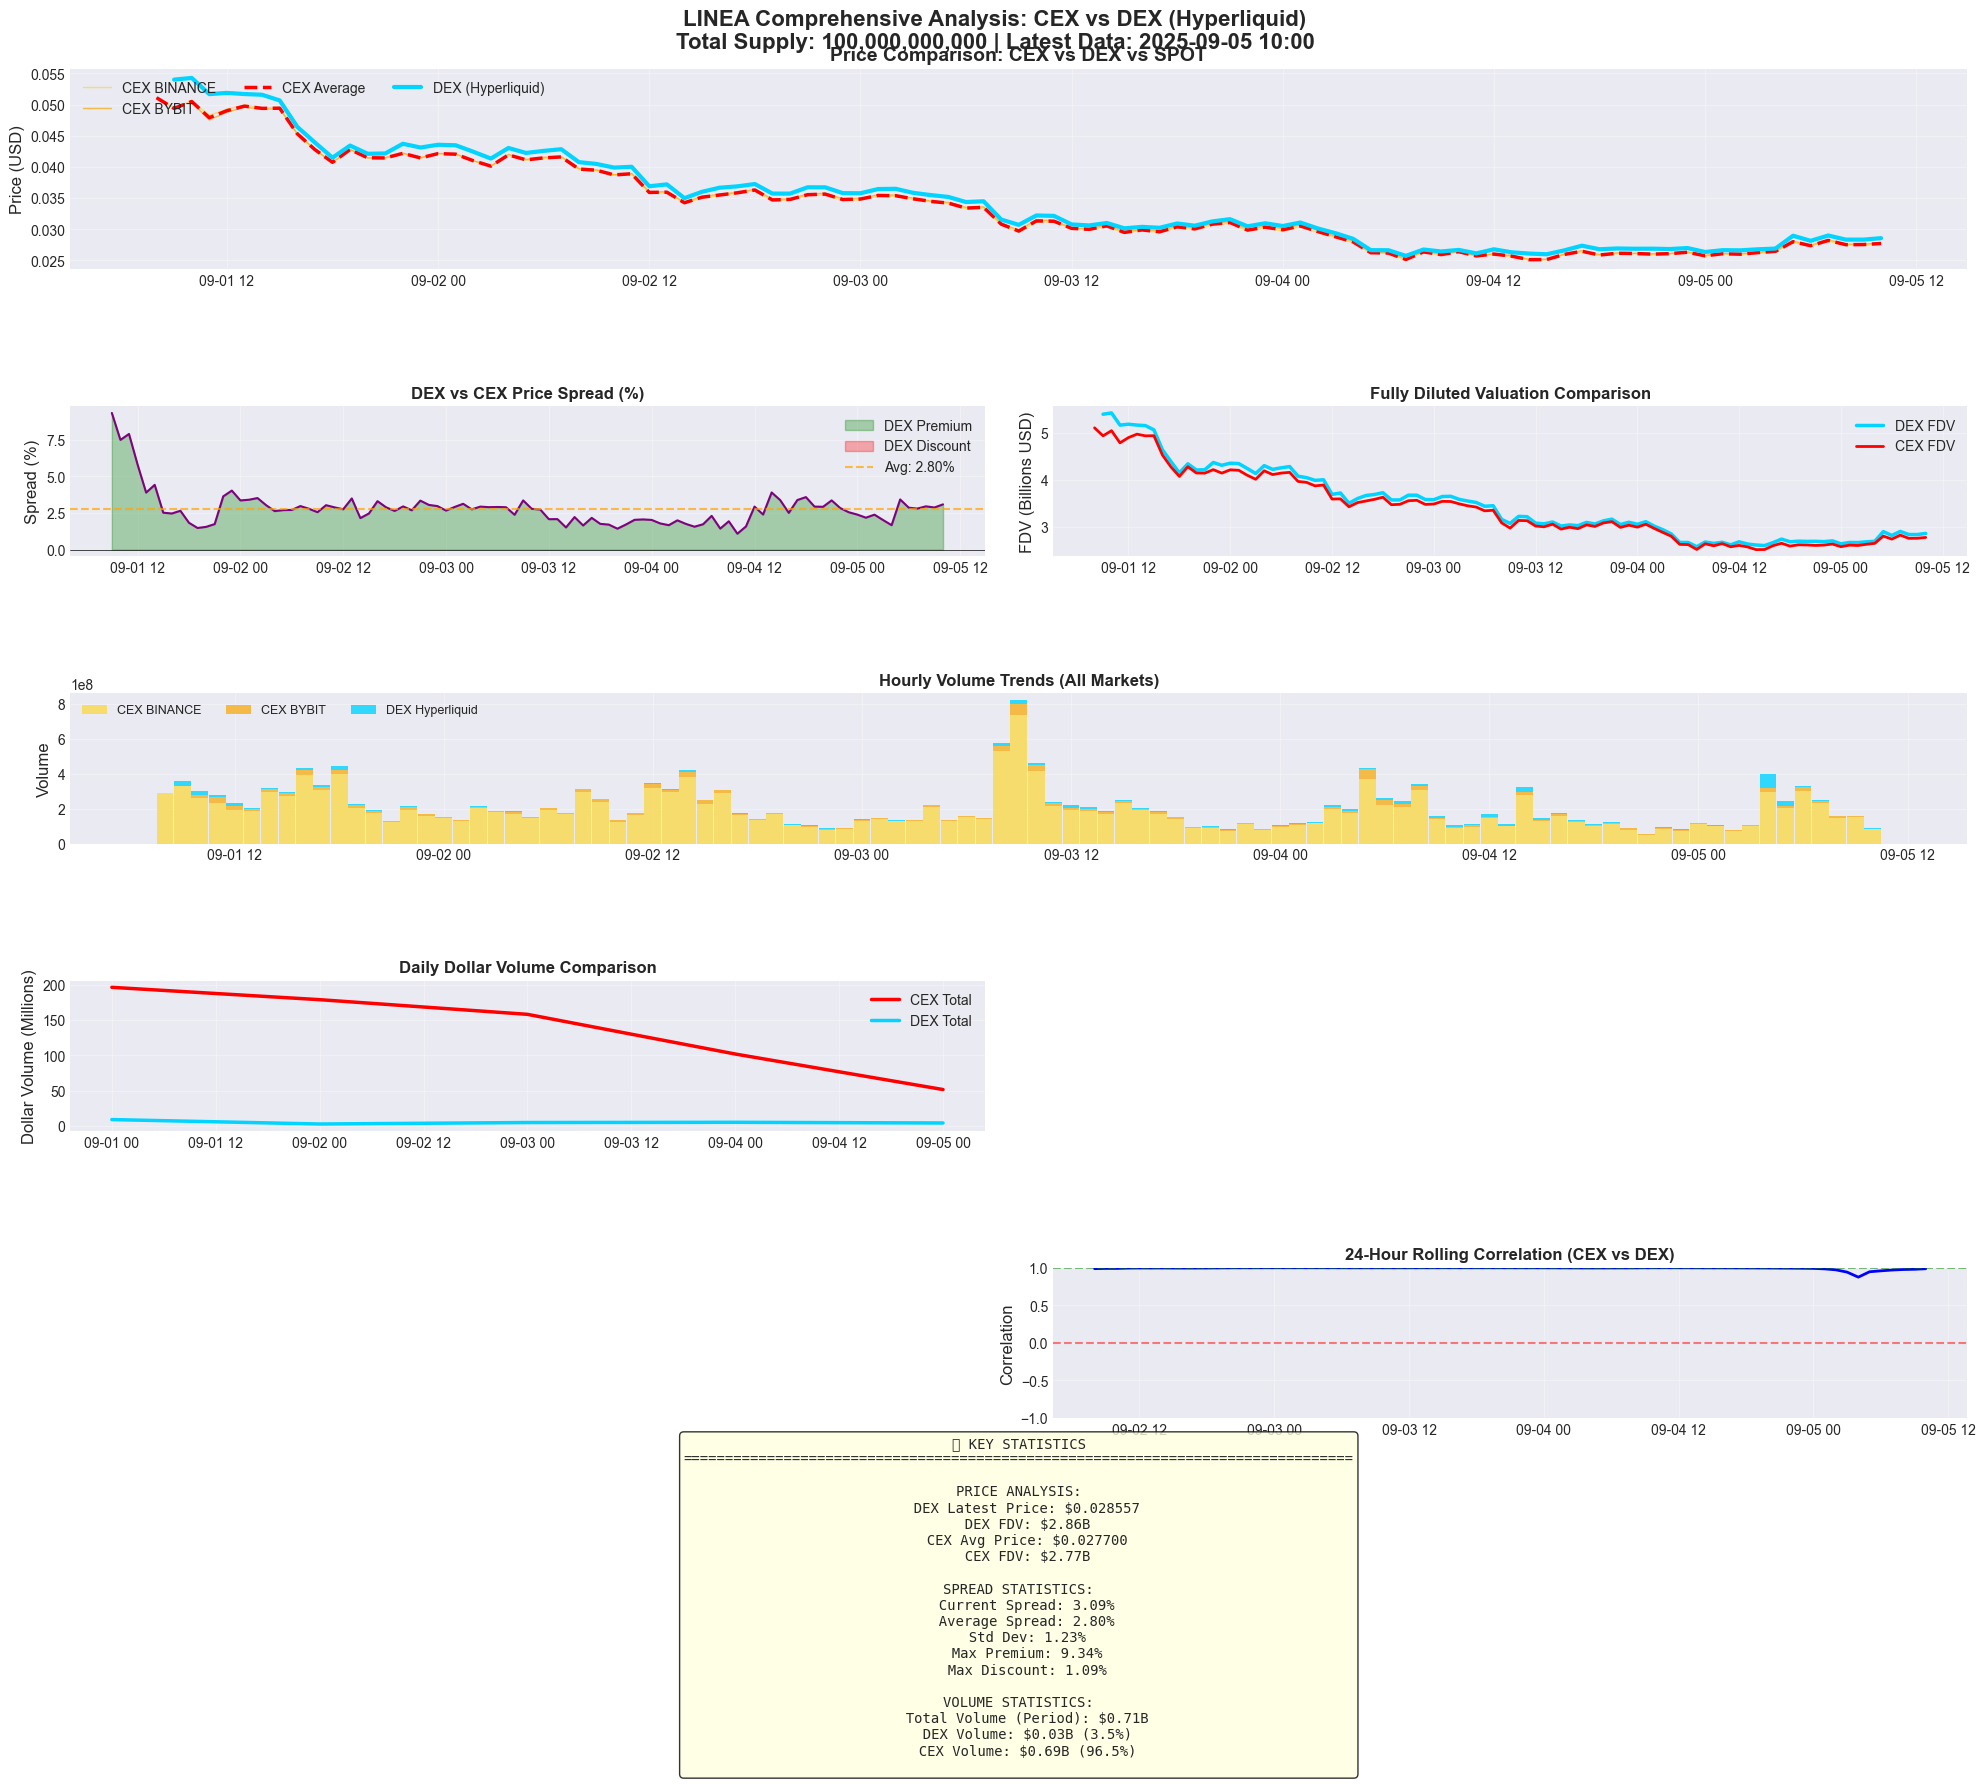


LINEA COMPREHENSIVE SUMMARY

📊 DATA AVAILABILITY:
   Total data points: 99
   Date range: 2025-09-01 08:00:00 to 2025-09-05 10:00:00
   CEX Exchanges: ['binance', 'bybit']
   DEX Available: Yes
   Spot Data: None

💰 LATEST PRICES:
   DEX (Hyperliquid): $0.028557
   CEX BINANCE: $0.027670
   CEX BYBIT: $0.027730
   CEX Average: $0.027700

📈 FULLY DILUTED VALUATION:
   DEX FDV: $2.86 Billion
   CEX FDV: $2.77 Billion

📊 SPREAD ANALYSIS (DEX vs CEX):
   Current: +3.09%
   24h Avg: +2.79%
   7d Avg: +2.80%
   All-time Avg: +2.80%
   DEX Premium Frequency: 100.0%
   DEX Discount Frequency: 0.0%

💾 Data exported to: LINEA_combined_data_20250905_125934.csv

ANALYSIS COMPLETE


In [1]:
"""
Complete Crypto Analysis System
Analyzes CEX vs DEX (Hyperliquid) with FDV calculations
Supports dynamic ticker configuration
"""

import ccxt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class CompleteCryptoAnalyzer:
    def __init__(self, ticker_config):
        """
        Initialize analyzer with ticker configuration
        
        Example ticker_config:
        {
            'base': 'LINEA',
            'spot_ticker': 'LINEA/USDT',
            'cex_perp_tickers': {
                'binance': 'LINEA/USDT:USDT',
                'bybit': 'LINEA/USDT:USDT',
                'okx': 'LINEA-USDT-SWAP'
            },
            'dex_ticker': 'LINEA',  # For Hyperliquid
            'total_supply': 100_000_000_000,  # 100 billion for LINEA
            'spot_launch_date': '2024-09-01'  # When spot was listed
        }
        """
        self.config = ticker_config
        self.base_ticker = ticker_config['base']
        self.total_supply = ticker_config['total_supply']
        self.spot_launch_date = ticker_config.get('spot_launch_date')
        
        # Initialize exchanges
        self.exchanges = self._initialize_exchanges()
        
        # Data storage
        self.cex_perp_data = {}
        self.dex_perp_data = None
        self.spot_data = {}
        self.combined_data = None
    
    def _initialize_exchanges(self):
        """Initialize CCXT exchange objects"""
        exchanges = {}
        
        print("Initializing exchanges...")
        
        # Binance
        try:
            exchanges['binance'] = ccxt.binance({
                'rateLimit': 1200,
                'enableRateLimit': True,
            })
            print("✅ Binance initialized")
        except Exception as e:
            print(f"❌ Failed to initialize Binance: {e}")
        
        # Bybit
        try:
            exchanges['bybit'] = ccxt.bybit({
                'rateLimit': 1200,
                'enableRateLimit': True,
            })
            print("✅ Bybit initialized")
        except Exception as e:
            print(f"❌ Failed to initialize Bybit: {e}")
        
        # OKX
        try:
            exchanges['okx'] = ccxt.okx({
                'rateLimit': 1200,
                'enableRateLimit': True,
            })
            print("✅ OKX initialized")
        except Exception as e:
            print(f"❌ Failed to initialize OKX: {e}")
        
        return exchanges
    
    def fetch_cex_data(self, exchange_name, ticker, data_type='perp', timeframe='1h', 
                      start_date="2024-08-22", limit=1000):
        """Fetch data from CEX using CCXT"""
        if exchange_name not in self.exchanges:
            print(f"❌ Exchange {exchange_name} not initialized")
            return None
        
        exchange = self.exchanges[exchange_name]
        
        try:
            # Convert start date to timestamp
            since = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp() * 1000)
            
            print(f"📊 Fetching {ticker} from {exchange_name} ({data_type})...")
            
            # Fetch OHLCV data
            ohlcv = exchange.fetch_ohlcv(ticker, timeframe, since=since, limit=limit)
            
            if ohlcv:
                df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
                df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
                df.set_index('datetime', inplace=True)
                df.drop('timestamp', axis=1, inplace=True)
                
                # Calculate dollar volume
                df['dollar_volume'] = df['volume'] * df['close']
                
                print(f"  ✅ {exchange_name}: {len(df)} candles, Latest: ${df['close'].iloc[-1]:,.4f}")
                
                # Store the data
                if data_type == 'perp':
                    self.cex_perp_data[exchange_name] = df
                elif data_type == 'spot':
                    self.spot_data[exchange_name] = df
                
                return df
            else:
                print(f"  ❌ {exchange_name}: No data returned")
                return None
                
        except Exception as e:
            print(f"  ❌ {exchange_name}: Error - {str(e)}")
            return None
    
    def fetch_hyperliquid_data(self, start_date="2024-08-22", interval="1h"):
        """Fetch data from Hyperliquid (DEX)"""
        print(f"\n📊 Fetching {self.config['dex_ticker']} from Hyperliquid (DEX)...")
        
        base_url = "https://api.hyperliquid.xyz/info"
        start_timestamp = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp() * 1000)
        end_timestamp = int(datetime.now().timestamp() * 1000)
        
        payload = {
            "type": "candleSnapshot",
            "req": {
                "coin": self.config['dex_ticker'],
                "interval": interval,
                "startTime": start_timestamp,
                "endTime": end_timestamp
            }
        }
        
        try:
            response = requests.post(base_url, json=payload, timeout=10)
            response.raise_for_status()
            data = response.json()
            
            if data:
                # Parse response
                if isinstance(data, list) and len(data) > 0:
                    df = pd.DataFrame(data)
                    
                    # Handle different column formats
                    if isinstance(data[0], dict):
                        column_mappings = {
                            't': 'timestamp', 'T': 'timestamp',
                            'o': 'open', 'h': 'high', 
                            'l': 'low', 'c': 'close',
                            'v': 'volume', 'n': 'trades'
                        }
                        for old_col, new_col in column_mappings.items():
                            if old_col in df.columns and new_col not in df.columns:
                                df[new_col] = df[old_col]
                    else:
                        # List of lists format
                        if len(df.columns) >= 6:
                            df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume'] + \
                                       [f'col_{i}' for i in range(6, len(df.columns))]
                    
                    # Convert timestamp
                    if 'timestamp' in df.columns:
                        df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
                        df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
                        df = df.set_index('datetime')
                        df.drop('timestamp', axis=1, inplace=True, errors='ignore')
                    
                    # Convert to numeric
                    for col in ['open', 'high', 'low', 'close', 'volume']:
                        if col in df.columns:
                            df[col] = pd.to_numeric(df[col], errors='coerce')
                    
                    # Calculate dollar volume
                    df['dollar_volume'] = df['close'] * df['volume']
                    
                    print(f"✅ Fetched {len(df)} candles from Hyperliquid")
                    print(f"   Latest price: ${df['close'].iloc[-1]:.6f}")
                    print(f"   Date range: {df.index[0]} to {df.index[-1]}")
                    
                    self.dex_perp_data = df
                    return df
            
            print("❌ No data returned from Hyperliquid")
            return None
            
        except Exception as e:
            print(f"❌ Error fetching Hyperliquid data: {e}")
            return None
    
    def fetch_all_cex_data(self, start_date="2024-08-22", timeframe='1h', limit=1000):
        """Fetch all CEX data (spot and perp)"""
        print("\n" + "="*60)
        print("FETCHING ALL CEX DATA")
        print("="*60)
        
        # Fetch perpetuals
        print("\n📈 Fetching CEX Perpetuals...")
        for exchange_name, ticker in self.config['cex_perp_tickers'].items():
            self.fetch_cex_data(exchange_name, ticker, 'perp', timeframe, start_date, limit)
        
        # Fetch spot (if available)
        if self.config.get('spot_ticker'):
            print("\n💰 Fetching CEX Spot...")
            spot_ticker = self.config['spot_ticker']
            for exchange_name in ['binance', 'bybit', 'okx']:
                if exchange_name in self.exchanges:
                    self.fetch_cex_data(exchange_name, spot_ticker, 'spot', timeframe, start_date, limit)
    
    def calculate_fdv(self, price_series):
        """Calculate Fully Diluted Valuation"""
        return price_series * self.total_supply
    
    def combine_all_data(self):
        """Combine CEX and DEX data for analysis"""
        print("\n🔄 Combining CEX and DEX data...")
        
        all_dfs = []
        
        # Add CEX perp data
        for exchange, df in self.cex_perp_data.items():
            if df is not None and not df.empty:
                df_copy = df[['close', 'volume', 'dollar_volume']].copy()
                df_copy.columns = [f'cex_{exchange}_close', f'cex_{exchange}_volume', 
                                  f'cex_{exchange}_dollar_volume']
                all_dfs.append(df_copy)
        
        # Add DEX perp data
        if self.dex_perp_data is not None and not self.dex_perp_data.empty:
            df_copy = self.dex_perp_data[['close', 'volume', 'dollar_volume']].copy()
            df_copy.columns = ['dex_hyperliquid_close', 'dex_hyperliquid_volume', 
                              'dex_hyperliquid_dollar_volume']
            all_dfs.append(df_copy)
        
        # Add spot data
        for exchange, df in self.spot_data.items():
            if df is not None and not df.empty:
                df_copy = df[['close', 'volume', 'dollar_volume']].copy()
                df_copy.columns = [f'spot_{exchange}_close', f'spot_{exchange}_volume',
                                  f'spot_{exchange}_dollar_volume']
                all_dfs.append(df_copy)
        
        if all_dfs:
            # Combine all dataframes
            combined = pd.concat(all_dfs, axis=1)
            combined = combined.sort_index()
            
            # Calculate CEX average
            cex_cols = [col for col in combined.columns if 'cex_' in col and '_close' in col]
            if cex_cols:
                combined['cex_avg_price'] = combined[cex_cols].mean(axis=1, skipna=True)
            
            # Calculate spread if DEX data exists
            if 'dex_hyperliquid_close' in combined.columns and 'cex_avg_price' in combined.columns:
                combined['spread_pct'] = ((combined['dex_hyperliquid_close'] - 
                                          combined['cex_avg_price']) / 
                                         combined['cex_avg_price']) * 100
                combined['spread_usd'] = (combined['dex_hyperliquid_close'] - 
                                         combined['cex_avg_price'])
            
            # Calculate FDV
            if 'dex_hyperliquid_close' in combined.columns:
                combined['fdv_dex'] = self.calculate_fdv(combined['dex_hyperliquid_close'])
            if 'cex_avg_price' in combined.columns:
                combined['fdv_cex'] = self.calculate_fdv(combined['cex_avg_price'])
            
            # Calculate spot average if exists
            spot_cols = [col for col in combined.columns if 'spot_' in col and '_close' in col]
            if spot_cols:
                combined['spot_avg_price'] = combined[spot_cols].mean(axis=1, skipna=True)
                combined['fdv_spot'] = self.calculate_fdv(combined['spot_avg_price'])
            
            self.combined_data = combined
            print(f"✅ Combined {len(combined)} data points")
            print(f"   Columns available: {len(combined.columns)}")
            return combined
        
        print("❌ No data to combine")
        return None
    
    def plot_comprehensive_analysis(self):
        """Create comprehensive visualization"""
        if self.combined_data is None or self.combined_data.empty:
            print("❌ No data to plot")
            return
        
        df = self.combined_data.dropna(how='all')
        
        # Set style
        plt.style.use('seaborn-v0_8-darkgrid')
        
        # Create figure with subplots
        fig = plt.figure(figsize=(20, 18))
        gs = GridSpec(6, 2, height_ratios=[2, 1.5, 1.5, 1.5, 1.5, 1])
        
        # Title
        fig.suptitle(f'{self.base_ticker} Comprehensive Analysis: CEX vs DEX (Hyperliquid)\n' + 
                    f'Total Supply: {self.total_supply:,.0f} | Latest Data: {df.index[-1].strftime("%Y-%m-%d %H:%M")}',
                    fontsize=16, fontweight='bold')
        
        # 1. Price Comparison (CEX vs DEX)
        ax1 = fig.add_subplot(gs[0, :])
        
        # Plot CEX prices
        cex_colors = {'binance': '#FCD535', 'bybit': '#F7A600', 'okx': '#3E3E3E'}
        for col in df.columns:
            if 'cex_' in col and '_close' in col:
                exchange = col.split('_')[1]
                ax1.plot(df.index, df[col], label=f'CEX {exchange.upper()}', 
                        color=cex_colors.get(exchange, 'gray'), alpha=0.7, linewidth=1)
        
        # Plot CEX average
        if 'cex_avg_price' in df.columns:
            ax1.plot(df.index, df['cex_avg_price'], label='CEX Average', 
                    color='red', linewidth=2.5, linestyle='--')
        
        # Plot DEX (Hyperliquid)
        if 'dex_hyperliquid_close' in df.columns:
            ax1.plot(df.index, df['dex_hyperliquid_close'], label='DEX (Hyperliquid)', 
                    color='#00D4FF', linewidth=3)
        
        # Plot Spot average
        if 'spot_avg_price' in df.columns:
            ax1.plot(df.index, df['spot_avg_price'], label='Spot Average', 
                    color='green', linewidth=2, linestyle=':')
        
        # Mark spot launch
        if self.spot_launch_date:
            spot_date = pd.to_datetime(self.spot_launch_date)
            if spot_date >= df.index[0] and spot_date <= df.index[-1]:
                ax1.axvline(x=spot_date, color='green', linestyle=':', alpha=0.5, linewidth=2)
                ax1.text(spot_date, ax1.get_ylim()[1]*0.95, 'Spot Launch', rotation=90, 
                        verticalalignment='top', color='green', fontweight='bold')
        
        ax1.set_ylabel('Price (USD)', fontsize=12)
        ax1.set_title('Price Comparison: CEX vs DEX vs SPOT', fontsize=14, fontweight='bold')
        ax1.legend(loc='upper left', ncol=3, fontsize=10)
        ax1.grid(True, alpha=0.3)
        
        # 2. Spread Analysis (DEX vs CEX)
        ax2 = fig.add_subplot(gs[1, 0])
        if 'spread_pct' in df.columns:
            ax2.plot(df.index, df['spread_pct'], color='purple', linewidth=1.5)
            ax2.fill_between(df.index, 0, df['spread_pct'], 
                            where=(df['spread_pct'] > 0), color='green', alpha=0.3, label='DEX Premium')
            ax2.fill_between(df.index, 0, df['spread_pct'], 
                            where=(df['spread_pct'] < 0), color='red', alpha=0.3, label='DEX Discount')
            ax2.axhline(y=0, color='black', linewidth=0.5)
            
            # Add average line
            avg_spread = df['spread_pct'].mean()
            ax2.axhline(y=avg_spread, color='orange', linestyle='--', alpha=0.7, 
                       label=f'Avg: {avg_spread:.2f}%')
            
            ax2.set_ylabel('Spread (%)', fontsize=12)
            ax2.set_title('DEX vs CEX Price Spread (%)', fontsize=12, fontweight='bold')
            ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # 3. FDV Comparison
        ax3 = fig.add_subplot(gs[1, 1])
        if 'fdv_dex' in df.columns:
            ax3.plot(df.index, df['fdv_dex'] / 1e9, label='DEX FDV', color='#00D4FF', linewidth=2.5)
        if 'fdv_cex' in df.columns:
            ax3.plot(df.index, df['fdv_cex'] / 1e9, label='CEX FDV', color='red', linewidth=2)
        if 'fdv_spot' in df.columns:
            ax3.plot(df.index, df['fdv_spot'] / 1e9, label='Spot FDV', color='green', linewidth=2, linestyle=':')
        
        ax3.set_ylabel('FDV (Billions USD)', fontsize=12)
        ax3.set_title('Fully Diluted Valuation Comparison', fontsize=12, fontweight='bold')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. Hourly Volume Trends
        ax4 = fig.add_subplot(gs[2, :])
        
        # Calculate hourly volumes
        volume_cols = [col for col in df.columns if 'volume' in col and 'dollar' not in col]
        if volume_cols:
            hourly_volumes = df[volume_cols].resample('1H').sum()
            
            # Prepare data for stacked bar
            cex_vols = {col: hourly_volumes[col] for col in volume_cols if 'cex_' in col}
            dex_vols = {col: hourly_volumes[col] for col in volume_cols if 'dex_' in col}
            spot_vols = {col: hourly_volumes[col] for col in volume_cols if 'spot_' in col}
            
            bottom = np.zeros(len(hourly_volumes))
            
            # Plot CEX volumes
            for col, data in cex_vols.items():
                exchange = col.split('_')[1]
                ax4.bar(hourly_volumes.index, data, bottom=bottom, 
                       label=f'CEX {exchange.upper()}', alpha=0.7, width=0.04,
                       color=cex_colors.get(exchange, 'gray'))
                bottom += data.fillna(0).values
            
            # Plot DEX volumes
            for col, data in dex_vols.items():
                ax4.bar(hourly_volumes.index, data, bottom=bottom,
                       label='DEX Hyperliquid', color='#00D4FF', alpha=0.8, width=0.04)
                bottom += data.fillna(0).values
            
            # Plot Spot volumes
            for col, data in spot_vols.items():
                exchange = col.split('_')[1]
                ax4.bar(hourly_volumes.index, data, bottom=bottom,
                       label=f'Spot {exchange.upper()}', alpha=0.6, width=0.04)
                bottom += data.fillna(0).values
        
        ax4.set_ylabel('Volume', fontsize=12)
        ax4.set_title('Hourly Volume Trends (All Markets)', fontsize=12, fontweight='bold')
        ax4.legend(loc='upper left', ncol=3, fontsize=9)
        ax4.grid(True, alpha=0.3)
        
        # 5. Dollar Volume Comparison
        ax5 = fig.add_subplot(gs[3, 0])
        dollar_vol_cols = [col for col in df.columns if 'dollar_volume' in col]
        if dollar_vol_cols:
            daily_dollar_vols = df[dollar_vol_cols].resample('1D').sum()
            
            cex_dollar_vols = [col for col in dollar_vol_cols if 'cex_' in col]
            dex_dollar_vols = [col for col in dollar_vol_cols if 'dex_' in col]
            spot_dollar_vols = [col for col in dollar_vol_cols if 'spot_' in col]
            
            if cex_dollar_vols:
                daily_dollar_vols['cex_total'] = daily_dollar_vols[cex_dollar_vols].sum(axis=1)
                ax5.plot(daily_dollar_vols.index, daily_dollar_vols['cex_total'] / 1e6,
                        label='CEX Total', color='red', linewidth=2.5)
            
            if dex_dollar_vols:
                daily_dollar_vols['dex_total'] = daily_dollar_vols[dex_dollar_vols].sum(axis=1)
                ax5.plot(daily_dollar_vols.index, daily_dollar_vols['dex_total'] / 1e6,
                        label='DEX Total', color='#00D4FF', linewidth=2.5)
            
            if spot_dollar_vols:
                daily_dollar_vols['spot_total'] = daily_dollar_vols[spot_dollar_vols].sum(axis=1)
                ax5.plot(daily_dollar_vols.index, daily_dollar_vols['spot_total'] / 1e6,
                        label='Spot Total', color='green', linewidth=2)
        
        ax5.set_ylabel('Dollar Volume (Millions)', fontsize=12)
        ax5.set_title('Daily Dollar Volume Comparison', fontsize=12, fontweight='bold')
        ax5.legend()
        ax5.grid(True, alpha=0.3)
        
        # # 6. Spread Distribution
        # ax6 = fig.add_subplot(gs[3, 1])
        # if 'spread_pct' in df.columns:
        #     spread_clean = df['spread_pct'].dropna()
        #     ax6.hist(spread_clean, bins=50, color='purple', alpha=0.7, edgecolor='black')
        #     ax6.axvline(x=0, color='red', linestyle='--', linewidth=2)
        #     ax6.axvline(x=spread_clean.mean(), color='orange', linestyle='--', linewidth=2,
        #                label=f'Mean: {spread_clean.mean():.2f}%')
        #     ax6.set_xlabel('Spread (%)', fontsize=12)
        #     ax6.set_ylabel('Frequency', fontsize=12)
        #     ax6.set_title('Spread Distribution', fontsize=12, fontweight='bold')
        #     ax6.grid(True, alpha=0.3)
        #     ax6.legend()
        
        # # 7. Volume Heatmap by Hour
        # ax7 = fig.add_subplot(gs[4, 0])
        # if dollar_vol_cols:
        #     # Create hourly heatmap data
        #     df_hourly = df.copy()
        #     df_hourly['hour'] = df_hourly.index.hour
        #     df_hourly['date'] = df_hourly.index.date
            
        #     # Sum all dollar volumes
        #     total_dollar_vol = df_hourly[dollar_vol_cols].sum(axis=1)
        #     df_hourly['total_dollar_volume'] = total_dollar_vol
            
        #     # Pivot for heatmap
        #     heatmap_data = df_hourly.pivot_table(values='total_dollar_volume', 
        #                                          index='hour', 
        #                                          columns='date', 
        #                                          aggfunc='sum')
            
        #     # Plot heatmap (limit to last 30 days for visibility)
        #     if not heatmap_data.empty:
        #         heatmap_data_recent = heatmap_data.iloc[:, -30:] if heatmap_data.shape[1] > 30 else heatmap_data
        #         sns.heatmap(heatmap_data_recent.fillna(0), cmap='YlOrRd', 
        #                    cbar_kws={'label': 'Dollar Volume'}, ax=ax7, fmt='.0f')
        #         ax7.set_xlabel('Date', fontsize=10)
        #         ax7.set_ylabel('Hour (UTC)', fontsize=10)
        #         ax7.set_title('Volume Heatmap by Hour (Last 30 Days)', fontsize=12, fontweight='bold')
                
        #         # Rotate x labels for better readability
        #         plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        # 8. Rolling Correlation (CEX vs DEX)
        ax8 = fig.add_subplot(gs[4, 1])
        if 'dex_hyperliquid_close' in df.columns and 'cex_avg_price' in df.columns:
            # Calculate rolling correlation
            rolling_corr = df['dex_hyperliquid_close'].rolling(window=24).corr(df['cex_avg_price'])
            ax8.plot(df.index, rolling_corr, color='blue', linewidth=2)
            ax8.axhline(y=1, color='green', linestyle='--', alpha=0.5)
            ax8.axhline(y=0, color='red', linestyle='--', alpha=0.5)
            ax8.set_ylabel('Correlation', fontsize=12)
            ax8.set_title('24-Hour Rolling Correlation (CEX vs DEX)', fontsize=12, fontweight='bold')
            ax8.set_ylim([-1, 1])
            ax8.grid(True, alpha=0.3)
        
        # 9. Statistics Summary
        ax9 = fig.add_subplot(gs[5, :])
        ax9.axis('off')
        
        # Calculate statistics
        stats_text = "📊 KEY STATISTICS\n" + "="*80 + "\n\n"
        
        # Price statistics
        stats_text += "PRICE ANALYSIS:\n"
        if 'dex_hyperliquid_close' in df.columns:
            latest_dex = df['dex_hyperliquid_close'].iloc[-1]
            stats_text += f"  DEX Latest Price: ${latest_dex:.6f}\n"
            stats_text += f"  DEX FDV: ${latest_dex * self.total_supply / 1e9:.2f}B\n"
        
        if 'cex_avg_price' in df.columns:
            latest_cex = df['cex_avg_price'].iloc[-1]
            stats_text += f"  CEX Avg Price: ${latest_cex:.6f}\n"
            stats_text += f"  CEX FDV: ${latest_cex * self.total_supply / 1e9:.2f}B\n"
        
        if 'spot_avg_price' in df.columns:
            latest_spot = df['spot_avg_price'].iloc[-1]
            stats_text += f"  Spot Avg Price: ${latest_spot:.6f}\n"
            stats_text += f"  Spot FDV: ${latest_spot * self.total_supply / 1e9:.2f}B\n"
        
        # Spread statistics
        if 'spread_pct' in df.columns:
            spread_clean = df['spread_pct'].dropna()
            stats_text += f"\nSPREAD STATISTICS:\n"
            stats_text += f"  Current Spread: {spread_clean.iloc[-1]:.2f}%\n"
            stats_text += f"  Average Spread: {spread_clean.mean():.2f}%\n"
            stats_text += f"  Std Dev: {spread_clean.std():.2f}%\n"
            stats_text += f"  Max Premium: {spread_clean.max():.2f}%\n"
            stats_text += f"  Max Discount: {spread_clean.min():.2f}%\n"
        
        # Volume statistics
        if dollar_vol_cols:
            total_vol = df[dollar_vol_cols].sum().sum()
            stats_text += f"\nVOLUME STATISTICS:\n"
            stats_text += f"  Total Volume (Period): ${total_vol/1e9:.2f}B\n"
            
            if 'dex_hyperliquid_dollar_volume' in df.columns:
                dex_vol = df['dex_hyperliquid_dollar_volume'].sum()
                stats_text += f"  DEX Volume: ${dex_vol/1e9:.2f}B ({dex_vol/total_vol*100:.1f}%)\n"
            
            cex_vol_cols = [col for col in dollar_vol_cols if 'cex_' in col]
            if cex_vol_cols:
                cex_vol = df[cex_vol_cols].sum().sum()
                stats_text += f"  CEX Volume: ${cex_vol/1e9:.2f}B ({cex_vol/total_vol*100:.1f}%)\n"
        
        ax9.text(0.5, 0.5, stats_text, transform=ax9.transAxes,
                fontsize=10, verticalalignment='center', horizontalalignment='center',
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
                family='monospace')
        
        plt.tight_layout()
        
        # Save the plot
        filename = f"{self.base_ticker}_complete_analysis_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"\n📊 Analysis saved as: {filename}")
        
        plt.show()
        
        return fig
    
    def print_summary(self):
        """Print comprehensive summary statistics"""
        if self.combined_data is None or self.combined_data.empty:
            print("No data available for summary")
            return
        
        df = self.combined_data
        
        print("\n" + "="*80)
        print(f"{self.base_ticker} COMPREHENSIVE SUMMARY")
        print("="*80)
        
        # Data availability
        print("\n📊 DATA AVAILABILITY:")
        print(f"   Total data points: {len(df)}")
        print(f"   Date range: {df.index[0]} to {df.index[-1]}")
        print(f"   CEX Exchanges: {list(self.cex_perp_data.keys())}")
        print(f"   DEX Available: {'Yes' if self.dex_perp_data is not None else 'No'}")
        print(f"   Spot Data: {list(self.spot_data.keys()) if self.spot_data else 'None'}")
        
        # Price comparison
        print("\n💰 LATEST PRICES:")
        if 'dex_hyperliquid_close' in df.columns:
            print(f"   DEX (Hyperliquid): ${df['dex_hyperliquid_close'].iloc[-1]:.6f}")
        
        for exchange in self.cex_perp_data.keys():
            col = f'cex_{exchange}_close'
            if col in df.columns and not df[col].isna().iloc[-1]:
                print(f"   CEX {exchange.upper()}: ${df[col].iloc[-1]:.6f}")
        
        if 'cex_avg_price' in df.columns:
            print(f"   CEX Average: ${df['cex_avg_price'].iloc[-1]:.6f}")
        
        # FDV comparison
        print("\n📈 FULLY DILUTED VALUATION:")
        if 'fdv_dex' in df.columns:
            print(f"   DEX FDV: ${df['fdv_dex'].iloc[-1]/1e9:.2f} Billion")
        if 'fdv_cex' in df.columns:
            print(f"   CEX FDV: ${df['fdv_cex'].iloc[-1]/1e9:.2f} Billion")
        if 'fdv_spot' in df.columns:
            print(f"   Spot FDV: ${df['fdv_spot'].iloc[-1]/1e9:.2f} Billion")
        
        # Spread analysis
        if 'spread_pct' in df.columns:
            spread_clean = df['spread_pct'].dropna()
            print("\n📊 SPREAD ANALYSIS (DEX vs CEX):")
            print(f"   Current: {spread_clean.iloc[-1]:+.2f}%")
            print(f"   24h Avg: {spread_clean.tail(24).mean():+.2f}%")
            print(f"   7d Avg: {spread_clean.tail(168).mean():+.2f}%")
            print(f"   All-time Avg: {spread_clean.mean():+.2f}%")
            
            # Spread distribution
            positive_spreads = (spread_clean > 0).sum() / len(spread_clean) * 100
            print(f"   DEX Premium Frequency: {positive_spreads:.1f}%")
            print(f"   DEX Discount Frequency: {100-positive_spreads:.1f}%")


def main():
    """Main execution function"""
    
    # ========================================
    # CONFIGURATION SECTION (EASILY CHANGEABLE)
    # ========================================
    
    # LINEA Configuration
    LINEA_config = {
        'base': 'LINEA',
        'spot_ticker': 'LINEA/USDT',
        'cex_perp_tickers': {
            'binance': 'LINEA/USDT:USDT',
            'bybit': 'LINEA/USDT:USDT',
            'okx': 'LINEA-USDT-SWAP'
        },
        'dex_ticker': 'LINEA',  # For Hyperliquid
        'total_supply': 100_000_000_000,  # 100 billion
        'spot_launch_date': '2024-09-01'
    }
    
    # Alternative configurations (uncomment to use)
    """
    # Bitcoin Configuration
    btc_config = {
        'base': 'BTC',
        'spot_ticker': 'BTC/USDT',
        'cex_perp_tickers': {
            'binance': 'BTC/USDT:USDT',
            'bybit': 'BTC/USDT:USDT',
            'okx': 'BTC-USDT-SWAP'
        },
        'dex_ticker': '@1',  # Hyperliquid uses @1 for BTC
        'total_supply': 21_000_000,
        'spot_launch_date': None
    }
    
    # Ethereum Configuration
    eth_config = {
        'base': 'ETH',
        'spot_ticker': 'ETH/USDT',
        'cex_perp_tickers': {
            'binance': 'ETH/USDT:USDT',
            'bybit': 'ETH/USDT:USDT',
            'okx': 'ETH-USDT-SWAP'
        },
        'dex_ticker': '@2',  # Hyperliquid uses @2 for ETH
        'total_supply': 120_000_000,
        'spot_launch_date': None
    }
    """
    
    # ========================================
    # EXECUTION
    # ========================================
    
    print("="*80)
    print(f"STARTING COMPLETE {LINEA_config['base']} ANALYSIS")
    print("="*80)
    
    # Initialize analyzer with chosen config
    analyzer = CompleteCryptoAnalyzer(LINEA_config)
    
    # Set analysis parameters
    start_date = "2024-08-22"  # Start date for data fetching
    timeframe = "1h"           # Candle timeframe
    limit = 1000               # Max candles to fetch
    
    print(f"\nAnalysis Parameters:")
    print(f"  Start Date: {start_date}")
    print(f"  Timeframe: {timeframe}")
    print(f"  Max Candles: {limit}")
    
    # Fetch all data
    print("\n" + "="*60)
    print("FETCHING DATA")
    print("="*60)
    
    # 1. Fetch DEX data from Hyperliquid
    analyzer.fetch_hyperliquid_data(start_date=start_date, interval=timeframe)
    
    # 2. Fetch CEX data (perps and spot)
    analyzer.fetch_all_cex_data(start_date=start_date, timeframe=timeframe, limit=limit)
    
    # 3. Combine all data
    analyzer.combine_all_data()
    
    # 4. Generate comprehensive visualization
    if analyzer.combined_data is not None and not analyzer.combined_data.empty:
        print("\n" + "="*60)
        print("GENERATING ANALYSIS")
        print("="*60)
        
        analyzer.plot_comprehensive_analysis()
        
        # 5. Print summary
        analyzer.print_summary()
        
        # 6. Export data to CSV
        csv_filename = f"{analyzer.base_ticker}_combined_data_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
        analyzer.combined_data.to_csv(csv_filename)
        print(f"\n💾 Data exported to: {csv_filename}")
    else:
        print("\n❌ Insufficient data for analysis")
    
    print("\n" + "="*80)
    print("ANALYSIS COMPLETE")
    print("="*80)


if __name__ == "__main__":
    main()

In [2]:
"""
Interactive Crypto Analysis System with Plotly
Analyzes CEX vs DEX (Hyperliquid) with FDV calculations and interactive charts
"""

import ccxt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

class InteractiveCryptoAnalyzer:
    def __init__(self, ticker_config):
        """
        Initialize analyzer with ticker configuration
        """
        self.config = ticker_config
        self.base_ticker = ticker_config['base']
        self.total_supply = ticker_config['total_supply']
        self.spot_launch_date = ticker_config.get('spot_launch_date')
        
        # Initialize exchanges
        self.exchanges = self._initialize_exchanges()
        
        # Data storage
        self.cex_perp_data = {}
        self.dex_perp_data = None
        self.spot_data = {}
        self.combined_data = None
    
    def _initialize_exchanges(self):
        """Initialize CCXT exchange objects"""
        exchanges = {}
        
        print("Initializing exchanges...")
        
        # Binance
        try:
            exchanges['binance'] = ccxt.binance({
                'rateLimit': 1200,
                'enableRateLimit': True,
            })
            print("✅ Binance initialized")
        except Exception as e:
            print(f"❌ Failed to initialize Binance: {e}")
        
        # Bybit
        try:
            exchanges['bybit'] = ccxt.bybit({
                'rateLimit': 1200,
                'enableRateLimit': True,
            })
            print("✅ Bybit initialized")
        except Exception as e:
            print(f"❌ Failed to initialize Bybit: {e}")
        
        # OKX
        try:
            exchanges['okx'] = ccxt.okx({
                'rateLimit': 1200,
                'enableRateLimit': True,
            })
            print("✅ OKX initialized")
        except Exception as e:
            print(f"❌ Failed to initialize OKX: {e}")
        
        return exchanges
    
    def fetch_cex_data(self, exchange_name, ticker, data_type='perp', timeframe='1h', 
                      start_date="2024-08-22", limit=1000):
        """Fetch data from CEX using CCXT"""
        if exchange_name not in self.exchanges:
            print(f"❌ Exchange {exchange_name} not initialized")
            return None
        
        exchange = self.exchanges[exchange_name]
        
        try:
            # Convert start date to timestamp
            since = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp() * 1000)
            
            print(f"📊 Fetching {ticker} from {exchange_name} ({data_type})...")
            
            # Fetch OHLCV data
            ohlcv = exchange.fetch_ohlcv(ticker, timeframe, since=since, limit=limit)
            
            if ohlcv:
                df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
                df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
                df.set_index('datetime', inplace=True)
                df.drop('timestamp', axis=1, inplace=True)
                
                # Calculate dollar volume
                df['dollar_volume'] = df['volume'] * df['close']
                
                print(f"  ✅ {exchange_name}: {len(df)} candles, Latest: ${df['close'].iloc[-1]:,.4f}")
                
                # Store the data
                if data_type == 'perp':
                    self.cex_perp_data[exchange_name] = df
                elif data_type == 'spot':
                    self.spot_data[exchange_name] = df
                
                return df
            else:
                print(f"  ❌ {exchange_name}: No data returned")
                return None
                
        except Exception as e:
            print(f"  ❌ {exchange_name}: Error - {str(e)}")
            return None
    
    def fetch_hyperliquid_data(self, start_date="2024-08-22", interval="1h"):
        """Fetch data from Hyperliquid (DEX)"""
        print(f"\n📊 Fetching {self.config['dex_ticker']} from Hyperliquid (DEX)...")
        
        base_url = "https://api.hyperliquid.xyz/info"
        start_timestamp = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp() * 1000)
        end_timestamp = int(datetime.now().timestamp() * 1000)
        
        payload = {
            "type": "candleSnapshot",
            "req": {
                "coin": self.config['dex_ticker'],
                "interval": interval,
                "startTime": start_timestamp,
                "endTime": end_timestamp
            }
        }
        
        try:
            response = requests.post(base_url, json=payload, timeout=10)
            response.raise_for_status()
            data = response.json()
            
            if data:
                # Parse response
                if isinstance(data, list) and len(data) > 0:
                    df = pd.DataFrame(data)
                    
                    # Handle different column formats
                    if isinstance(data[0], dict):
                        column_mappings = {
                            't': 'timestamp', 'T': 'timestamp',
                            'o': 'open', 'h': 'high', 
                            'l': 'low', 'c': 'close',
                            'v': 'volume', 'n': 'trades'
                        }
                        for old_col, new_col in column_mappings.items():
                            if old_col in df.columns and new_col not in df.columns:
                                df[new_col] = df[old_col]
                    else:
                        # List of lists format
                        if len(df.columns) >= 6:
                            df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume'] + \
                                       [f'col_{i}' for i in range(6, len(df.columns))]
                    
                    # Convert timestamp
                    if 'timestamp' in df.columns:
                        df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
                        df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
                        df = df.set_index('datetime')
                        df.drop('timestamp', axis=1, inplace=True, errors='ignore')
                    
                    # Convert to numeric
                    for col in ['open', 'high', 'low', 'close', 'volume']:
                        if col in df.columns:
                            df[col] = pd.to_numeric(df[col], errors='coerce')
                    
                    # Calculate dollar volume
                    df['dollar_volume'] = df['close'] * df['volume']
                    
                    print(f"✅ Fetched {len(df)} candles from Hyperliquid")
                    print(f"   Latest price: ${df['close'].iloc[-1]:.6f}")
                    
                    self.dex_perp_data = df
                    return df
            
            return None
            
        except Exception as e:
            print(f"❌ Error fetching Hyperliquid data: {e}")
            return None
    
    def fetch_all_cex_data(self, start_date="2024-08-22", timeframe='1h', limit=1000):
        """Fetch all CEX data (spot and perp)"""
        print("\nFetching CEX Data...")
        
        # Fetch perpetuals
        for exchange_name, ticker in self.config['cex_perp_tickers'].items():
            self.fetch_cex_data(exchange_name, ticker, 'perp', timeframe, start_date, limit)
        
        # Fetch spot (if available)
        if self.config.get('spot_ticker'):
            spot_ticker = self.config['spot_ticker']
            for exchange_name in ['binance', 'bybit', 'okx']:
                if exchange_name in self.exchanges:
                    self.fetch_cex_data(exchange_name, spot_ticker, 'spot', timeframe, start_date, limit)
    
    def combine_all_data(self):
        """Combine CEX and DEX data for analysis"""
        print("\n🔄 Combining CEX and DEX data...")
        
        all_dfs = []
        
        # Add CEX perp data
        for exchange, df in self.cex_perp_data.items():
            if df is not None and not df.empty:
                df_copy = df[['close', 'volume', 'dollar_volume']].copy()
                df_copy.columns = [f'cex_{exchange}_close', f'cex_{exchange}_volume', 
                                  f'cex_{exchange}_dollar_volume']
                all_dfs.append(df_copy)
        
        # Add DEX perp data
        if self.dex_perp_data is not None and not self.dex_perp_data.empty:
            df_copy = self.dex_perp_data[['close', 'volume', 'dollar_volume']].copy()
            df_copy.columns = ['dex_hyperliquid_close', 'dex_hyperliquid_volume', 
                              'dex_hyperliquid_dollar_volume']
            all_dfs.append(df_copy)
        
        # Add spot data
        for exchange, df in self.spot_data.items():
            if df is not None and not df.empty:
                df_copy = df[['close', 'volume', 'dollar_volume']].copy()
                df_copy.columns = [f'spot_{exchange}_close', f'spot_{exchange}_volume',
                                  f'spot_{exchange}_dollar_volume']
                all_dfs.append(df_copy)
        
        if all_dfs:
            # Combine all dataframes
            combined = pd.concat(all_dfs, axis=1)
            combined = combined.sort_index()
            
            # Calculate CEX average
            cex_cols = [col for col in combined.columns if 'cex_' in col and '_close' in col]
            if cex_cols:
                combined['cex_avg_price'] = combined[cex_cols].mean(axis=1, skipna=True)
            
            # Calculate spread if DEX data exists
            if 'dex_hyperliquid_close' in combined.columns and 'cex_avg_price' in combined.columns:
                combined['spread_pct'] = ((combined['dex_hyperliquid_close'] - 
                                          combined['cex_avg_price']) / 
                                         combined['cex_avg_price']) * 100
                combined['spread_usd'] = (combined['dex_hyperliquid_close'] - 
                                         combined['cex_avg_price'])
            
            # Calculate FDV
            if 'dex_hyperliquid_close' in combined.columns:
                combined['fdv_dex'] = combined['dex_hyperliquid_close'] * self.total_supply
            if 'cex_avg_price' in combined.columns:
                combined['fdv_cex'] = combined['cex_avg_price'] * self.total_supply
            
            # Calculate spot average if exists
            spot_cols = [col for col in combined.columns if 'spot_' in col and '_close' in col]
            if spot_cols:
                combined['spot_avg_price'] = combined[spot_cols].mean(axis=1, skipna=True)
                combined['fdv_spot'] = combined['spot_avg_price'] * self.total_supply
            
            self.combined_data = combined
            print(f"✅ Combined {len(combined)} data points")
            return combined
        
        return None
    
    def create_interactive_dashboard(self):
        """Create interactive dashboard using Plotly"""
        if self.combined_data is None or self.combined_data.empty:
            print("❌ No data to plot")
            return None
        
        df = self.combined_data.dropna(how='all')
        
        # Create subplots
        fig = make_subplots(
            rows=4, cols=2,
            row_heights=[0.3, 0.25, 0.25, 0.2],
            subplot_titles=(
                'Price Comparison: CEX vs DEX vs SPOT',
                'Spread Analysis (DEX vs CEX Average)',
                'Hourly Volume Trends',
                'FDV Comparison (Billions USD)',
                'Daily Dollar Volume',
                'Spread Distribution',
                'Rolling 24h Correlation',
                'Volume Heatmap'
            ),
            specs=[
                [{'colspan': 2}, None],
                [{'secondary_y': False}, {'secondary_y': False}],
                [{'colspan': 2}, None],
                [{'secondary_y': False}, {'type': 'heatmap'}]
            ],
            vertical_spacing=0.1,
            horizontal_spacing=0.15
        )
        
        # Color scheme
        colors = {
            'binance': '#FCD535',
            'bybit': '#F7A600',
            'okx': '#3E3E3E',
            'dex': '#00D4FF',
            'cex_avg': '#FF4444',
            'spot': '#00FF00'
        }
        
        # 1. Price Comparison
        # Plot CEX prices
        for col in df.columns:
            if 'cex_' in col and '_close' in col:
                exchange = col.split('_')[1]
                fig.add_trace(
                    go.Scatter(
                        x=df.index,
                        y=df[col],
                        name=f'CEX {exchange.upper()}',
                        line=dict(color=colors.get(exchange, 'gray'), width=1),
                        opacity=0.7,
                        hovertemplate='%{x}<br>Price: $%{y:.6f}<extra></extra>'
                    ),
                    row=1, col=1
                )
        
        # CEX Average
        if 'cex_avg_price' in df.columns:
            fig.add_trace(
                go.Scatter(
                    x=df.index,
                    y=df['cex_avg_price'],
                    name='CEX Average',
                    line=dict(color=colors['cex_avg'], width=2, dash='dash'),
                    hovertemplate='%{x}<br>CEX Avg: $%{y:.6f}<extra></extra>'
                ),
                row=1, col=1
            )
        
        # DEX (Hyperliquid)
        if 'dex_hyperliquid_close' in df.columns:
            fig.add_trace(
                go.Scatter(
                    x=df.index,
                    y=df['dex_hyperliquid_close'],
                    name='DEX (Hyperliquid)',
                    line=dict(color=colors['dex'], width=3),
                    hovertemplate='%{x}<br>DEX: $%{y:.6f}<extra></extra>'
                ),
                row=1, col=1
            )
        
        # Spot Average
        if 'spot_avg_price' in df.columns:
            fig.add_trace(
                go.Scatter(
                    x=df.index,
                    y=df['spot_avg_price'],
                    name='Spot Average',
                    line=dict(color=colors['spot'], width=2, dash='dot'),
                    opacity=0.8,
                    hovertemplate='%{x}<br>Spot: $%{y:.6f}<extra></extra>'
                ),
                row=1, col=1
            )
        
        # Mark spot launch
        if self.spot_launch_date:
            try:
                spot_date = pd.to_datetime(self.spot_launch_date)
                if spot_date >= df.index.min() and spot_date <= df.index.max():
                    fig.add_vline(
                        x=spot_date, 
                        line_width=2, 
                        line_dash="dash", 
                        line_color="green",
                        annotation_text="Spot Launch",
                        row=1, col=1
                    )
            except Exception as e:
                print(f"Could not add spot launch marker: {e}")
        
        # 2. Spread Analysis
        if 'spread_pct' in df.columns:
            fig.add_trace(
                go.Scatter(
                    x=df.index,
                    y=df['spread_pct'],
                    name='Spread %',
                    fill='tonexty',
                    fillcolor='rgba(128, 0, 128, 0.2)',
                    line=dict(color='purple', width=2),
                    hovertemplate='%{x}<br>Spread: %{y:.2f}%<extra></extra>'
                ),
                row=2, col=1
            )
            
            # Add zero line
            fig.add_hline(y=0, line_width=1, line_color="black", row=2, col=1)
            
            # Add average line
            avg_spread = df['spread_pct'].mean()
            fig.add_hline(
                y=avg_spread, 
                line_width=1, 
                line_dash="dash", 
                line_color="orange",
                annotation_text=f"Avg: {avg_spread:.2f}%",
                row=2, col=1
            )
        
        # 3. FDV Comparison
        if 'fdv_dex' in df.columns:
            fig.add_trace(
                go.Scatter(
                    x=df.index,
                    y=df['fdv_dex'] / 1e9,
                    name='DEX FDV',
                    line=dict(color=colors['dex'], width=2),
                    hovertemplate='%{x}<br>FDV: $%{y:.2f}B<extra></extra>'
                ),
                row=2, col=2
            )
        
        if 'fdv_cex' in df.columns:
            fig.add_trace(
                go.Scatter(
                    x=df.index,
                    y=df['fdv_cex'] / 1e9,
                    name='CEX FDV',
                    line=dict(color=colors['cex_avg'], width=2),
                    hovertemplate='%{x}<br>FDV: $%{y:.2f}B<extra></extra>'
                ),
                row=2, col=2
            )
        
        # 4. Hourly Volume Trends
        volume_cols = [col for col in df.columns if 'volume' in col and 'dollar' not in col]
        if volume_cols:
            hourly_volumes = df[volume_cols].resample('1H').sum()
            
            for col in volume_cols:
                market_type = col.split('_')[0]
                exchange = col.split('_')[1] if len(col.split('_')) > 1 else ''
                
                fig.add_trace(
                    go.Bar(
                        x=hourly_volumes.index,
                        y=hourly_volumes[col],
                        name=f'{market_type.upper()} {exchange.upper()}',
                        hovertemplate='%{x}<br>Volume: %{y:.2f}<extra></extra>'
                    ),
                    row=3, col=1
                )
        
        # 5. Daily Dollar Volume
        dollar_vol_cols = [col for col in df.columns if 'dollar_volume' in col]
        if dollar_vol_cols:
            daily_dollar_vols = df[dollar_vol_cols].resample('1D').sum()
            
            # CEX Total
            cex_dollar_vols = [col for col in dollar_vol_cols if 'cex_' in col]
            if cex_dollar_vols:
                daily_dollar_vols['cex_total'] = daily_dollar_vols[cex_dollar_vols].sum(axis=1)
                fig.add_trace(
                    go.Scatter(
                        x=daily_dollar_vols.index,
                        y=daily_dollar_vols['cex_total'] / 1e6,
                        name='CEX Total',
                        line=dict(color=colors['cex_avg'], width=2),
                        hovertemplate='%{x}<br>Volume: $%{y:.2f}M<extra></extra>'
                    ),
                    row=4, col=1
                )
            
            # DEX Total
            dex_dollar_vols = [col for col in dollar_vol_cols if 'dex_' in col]
            if dex_dollar_vols:
                daily_dollar_vols['dex_total'] = daily_dollar_vols[dex_dollar_vols].sum(axis=1)
                fig.add_trace(
                    go.Scatter(
                        x=daily_dollar_vols.index,
                        y=daily_dollar_vols['dex_total'] / 1e6,
                        name='DEX Total',
                        line=dict(color=colors['dex'], width=2),
                        hovertemplate='%{x}<br>Volume: $%{y:.2f}M<extra></extra>'
                    ),
                    row=4, col=1
                )
        
        # # 6. Spread Distribution (using histogram instead)
        # if 'spread_pct' in df.columns:
        #     spread_clean = df['spread_pct'].dropna()
        #     fig.add_trace(
        #         go.Histogram(
        #             x=spread_clean,
        #             nbinsx=50,
        #             name='Spread Distribution',
        #             marker_color='purple',
        #             opacity=0.7,
        #             hovertemplate='Spread: %{x:.2f}%<br>Count: %{y}<extra></extra>'
        #         ),
        #         row=4, col=1
        #     )
        
        # # 7. Rolling Correlation
        # if 'dex_hyperliquid_close' in df.columns and 'cex_avg_price' in df.columns:
        #     rolling_corr = df['dex_hyperliquid_close'].rolling(window=24).corr(df['cex_avg_price'])
        #     fig.add_trace(
        #         go.Scatter(
        #             x=df.index,
        #             y=rolling_corr,
        #             name='24h Correlation',
        #             line=dict(color='blue', width=2),
        #             hovertemplate='%{x}<br>Correlation: %{y:.3f}<extra></extra>'
        #         ),
        #         row=4, col=1
        #     )
        
        # # 8. Volume Heatmap
        # if dollar_vol_cols:
        #     df_hourly = df.copy()
        #     df_hourly['hour'] = df_hourly.index.hour
        #     df_hourly['date'] = df_hourly.index.date
            
        #     total_dollar_vol = df_hourly[dollar_vol_cols].sum(axis=1)
        #     df_hourly['total_dollar_volume'] = total_dollar_vol
            
        #     heatmap_data = df_hourly.pivot_table(
        #         values='total_dollar_volume',
        #         index='hour',
        #         columns='date',
        #         aggfunc='sum'
        #     ).fillna(0)
            
        #     # Limit to last 30 days for visibility
        #     if heatmap_data.shape[1] > 30:
        #         heatmap_data = heatmap_data.iloc[:, -30:]
            
        #     fig.add_trace(
        #         go.Heatmap(
        #             z=heatmap_data.values,
        #             x=heatmap_data.columns,
        #             y=heatmap_data.index,
        #             colorscale='YlOrRd',
        #             name='Volume Heatmap',
        #             hovertemplate='Date: %{x}<br>Hour: %{y}<br>Volume: $%{z:.2f}<extra></extra>'
        #         ),
        #         row=4, col=2
        #     )
        
        # Update layout
        fig.update_layout(
            title_text=f"{self.base_ticker} Interactive Analysis Dashboard",
            height=1400,
            showlegend=True,
            hovermode='x unified',
            template='plotly_dark'
        )
        
        # Update axes labels
        fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
        fig.update_yaxes(title_text="Spread (%)", row=2, col=1)
        fig.update_yaxes(title_text="FDV (Billions)", row=2, col=2)
        fig.update_yaxes(title_text="Volume", row=3, col=1)
        fig.update_yaxes(title_text="Dollar Volume (M)", row=4, col=1)
        fig.update_yaxes(title_text="Hour", row=4, col=2)
        
        fig.update_xaxes(title_text="Date", row=4, col=1)
        fig.update_xaxes(title_text="Date", row=4, col=2)
        
        return fig
    
    def create_fdv_table(self):
        """Create FDV comparison table"""
        if self.combined_data is None or self.combined_data.empty:
            print("❌ No data for FDV table")
            return None
        
        df = self.combined_data
        
        # Prepare data for table
        table_data = []
        
        # Sample data points (hourly for last 24h, then daily)
        recent_hours = df.tail(24)  # Last 24 hours
        daily_data = df.resample('1D').last().tail(30)  # Last 30 days
        
        # Combine recent hours and daily data
        combined_samples = pd.concat([recent_hours, daily_data]).drop_duplicates()
        combined_samples = combined_samples.sort_index(ascending=False)
        
        for idx, row in combined_samples.iterrows():
            record = {
                'Datetime': idx.strftime('%Y-%m-%d %H:%M'),
                'DEX Price': f"${row.get('dex_hyperliquid_close', np.nan):.6f}" if pd.notna(row.get('dex_hyperliquid_close')) else 'N/A',
                'CEX Avg Price': f"${row.get('cex_avg_price', np.nan):.6f}" if pd.notna(row.get('cex_avg_price')) else 'N/A',
                'DEX FDV (B)': f"${row.get('fdv_dex', 0)/1e9:.2f}" if pd.notna(row.get('fdv_dex')) else 'N/A',
                'CEX FDV (B)': f"${row.get('fdv_cex', 0)/1e9:.2f}" if pd.notna(row.get('fdv_cex')) else 'N/A',
                'Spread (%)': f"{row.get('spread_pct', np.nan):+.2f}" if pd.notna(row.get('spread_pct')) else 'N/A',
                'DEX Volume': f"{row.get('dex_hyperliquid_volume', 0):,.0f}" if pd.notna(row.get('dex_hyperliquid_volume')) else 'N/A',
                'CEX Total Vol': f"{sum([row.get(f'cex_{ex}_volume', 0) for ex in ['binance', 'bybit', 'okx']]):,.0f}"
            }
            table_data.append(record)
        
        # Create DataFrame for table
        table_df = pd.DataFrame(table_data)
        
        # Create Plotly table
        fig_table = go.Figure(data=[go.Table(
            header=dict(
                values=list(table_df.columns),
                fill_color='#00D4FF',
                align='center',
                font=dict(color='white', size=12)
            ),
            cells=dict(
                values=[table_df[col] for col in table_df.columns],
                fill_color=['#1e1e1e', '#2a2a2a'] * (len(table_df) // 2 + 1),
                align=['center', 'right', 'right', 'right', 'right', 'right', 'right', 'right'],
                font=dict(color='white', size=11),
                height=25
            )
        )])
        
        fig_table.update_layout(
            title=f"{self.base_ticker} FDV Comparison Table (CEX vs DEX)",
            height=800,
            template='plotly_dark'
        )
        
        return fig_table, table_df
    
    def save_interactive_dashboard(self, filename=None):
        """Save interactive dashboard as HTML"""
        if filename is None:
            filename = f"{self.base_ticker}_interactive_dashboard_{datetime.now().strftime('%Y%m%d_%H%M%S')}.html"
        
        # Create dashboard
        fig = self.create_interactive_dashboard()
        if fig:
            fig.write_html(filename)
            print(f"📊 Interactive dashboard saved as: {filename}")
            return filename
        return None
    
    def save_fdv_table(self, filename=None):
        """Save FDV table as HTML and CSV"""
        if filename is None:
            base_filename = f"{self.base_ticker}_fdv_table_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
        else:
            base_filename = filename.replace('.html', '').replace('.csv', '')
        
        # Create table
        fig_table, table_df = self.create_fdv_table()
        
        if fig_table and table_df is not None:
            # Save as HTML
            html_filename = f"{base_filename}.html"
            fig_table.write_html(html_filename)
            print(f"📊 FDV table saved as: {html_filename}")
            
            # Save as CSV
            csv_filename = f"{base_filename}.csv"
            table_df.to_csv(csv_filename, index=False)
            print(f"📊 FDV data saved as: {csv_filename}")
            
            return html_filename, csv_filename
        return None, None


def main():
    """Main execution function with interactive plots"""
    
    # Configuration for LINEA
    LINEA_config = {
        'base': 'LINEA',
        'spot_ticker': 'LINEA/USDT',
        'cex_perp_tickers': {
            'binance': 'LINEA/USDT:USDT',
            'bybit': 'LINEA/USDT:USDT',
            'okx': 'LINEA-USDT-SWAP'
        },
        'dex_ticker': 'LINEA',  # For Hyperliquid
        'total_supply': 100_000_000_000,  # 100 billion
        'spot_launch_date': '2024-09-01'
    }
    
    print("="*80)
    print(f"STARTING INTERACTIVE {LINEA_config['base']} ANALYSIS")
    print("="*80)
    
    # Initialize analyzer
    analyzer = InteractiveCryptoAnalyzer(LINEA_config)
    
    # Set analysis parameters
    start_date = "2024-08-22"
    timeframe = "1h"
    limit = 1000
    
    print(f"\nAnalysis Parameters:")
    print(f"  Start Date: {start_date}")
    print(f"  Timeframe: {timeframe}")
    print(f"  Max Candles: {limit}")
    
    # Fetch all data
    print("\n" + "="*60)
    print("FETCHING DATA")
    print("="*60)
    
    # 1. Fetch DEX data from Hyperliquid
    analyzer.fetch_hyperliquid_data(start_date=start_date, interval=timeframe)
    
    # 2. Fetch CEX data
    analyzer.fetch_all_cex_data(start_date=start_date, timeframe=timeframe, limit=limit)
    
    # 3. Combine all data
    analyzer.combine_all_data()
    
    # 4. Generate interactive visualizations
    if analyzer.combined_data is not None and not analyzer.combined_data.empty:
        print("\n" + "="*60)
        print("GENERATING INTERACTIVE ANALYSIS")
        print("="*60)
        
        # Create and save interactive dashboard
        dashboard_file = analyzer.save_interactive_dashboard()
        
        # Create and save FDV table
        table_html, table_csv = analyzer.save_fdv_table()
        
        # Display in notebook if running in Jupyter
        try:
            from IPython.display import display
            fig = analyzer.create_interactive_dashboard()
            fig_table, _ = analyzer.create_fdv_table()
            if fig:
                display(fig)
            if fig_table:
                display(fig_table)
        except:
            print("\n💡 Open the HTML files in your browser to view interactive charts")
        
        print("\n" + "="*60)
        print("SUMMARY")
        print("="*60)
        
        df = analyzer.combined_data
        
        # Print latest statistics
        if 'dex_hyperliquid_close' in df.columns:
            print(f"\n📊 DEX (Hyperliquid):")
            print(f"   Latest Price: ${df['dex_hyperliquid_close'].iloc[-1]:.6f}")
            print(f"   Latest FDV: ${df['fdv_dex'].iloc[-1]/1e9:.2f}B")
        
        if 'cex_avg_price' in df.columns:
            print(f"\n📊 CEX Average:")
            print(f"   Latest Price: ${df['cex_avg_price'].iloc[-1]:.6f}")
            print(f"   Latest FDV: ${df['fdv_cex'].iloc[-1]/1e9:.2f}B")
        
        if 'spread_pct' in df.columns:
            print(f"\n📊 Spread:")
            print(f"   Current: {df['spread_pct'].iloc[-1]:+.2f}%")
            print(f"   24h Avg: {df['spread_pct'].tail(24).mean():+.2f}%")
    
    else:
        print("\n❌ Insufficient data for analysis")
    
    print("\n" + "="*80)
    print("ANALYSIS COMPLETE")
    print("="*80)
    print("\n📁 Output Files:")
    print("   • Interactive Dashboard (HTML)")
    print("   • FDV Comparison Table (HTML + CSV)")
    print("\n💡 Open the HTML files in your browser for interactive exploration!")


if __name__ == "__main__":
    main()

STARTING INTERACTIVE LINEA ANALYSIS
Initializing exchanges...
✅ Binance initialized
✅ Bybit initialized
✅ OKX initialized

Analysis Parameters:
  Start Date: 2024-08-22
  Timeframe: 1h
  Max Candles: 1000

FETCHING DATA

📊 Fetching LINEA from Hyperliquid (DEX)...
✅ Fetched 98 candles from Hyperliquid
   Latest price: $0.028590

Fetching CEX Data...
📊 Fetching LINEA/USDT:USDT from binance (perp)...
  ✅ binance: 99 candles, Latest: $0.0276
📊 Fetching LINEA/USDT:USDT from bybit (perp)...
  ✅ bybit: 98 candles, Latest: $0.0277
📊 Fetching LINEA-USDT-SWAP from okx (perp)...
  ❌ okx: No data returned
📊 Fetching LINEA/USDT from binance (spot)...
  ❌ binance: Error - binance does not have market symbol LINEA/USDT
📊 Fetching LINEA/USDT from bybit (spot)...
  ❌ bybit: Error - bybit does not have market symbol LINEA/USDT
📊 Fetching LINEA/USDT from okx (spot)...
  ❌ okx: Error - okx does not have market symbol LINEA/USDT

🔄 Combining CEX and DEX data...
✅ Combined 100 data points

GENERATING INTERA


SUMMARY

📊 DEX (Hyperliquid):
   Latest Price: $nan
   Latest FDV: $nanB

📊 CEX Average:
   Latest Price: $0.027660
   Latest FDV: $2.77B

📊 Spread:
   Current: +nan%
   24h Avg: +2.86%

ANALYSIS COMPLETE

📁 Output Files:
   • Interactive Dashboard (HTML)
   • FDV Comparison Table (HTML + CSV)

💡 Open the HTML files in your browser for interactive exploration!
